# Model-Agnostic Meta Learning - Regression

This is an implementation of the paper "Model-Agnostic Meta Learning for Adaptation of Deep Networks"
Paper link: https://arxiv.org/pdf/1703.03400.pdf

In [1]:
import math
import random
import copy
import torch
import matplotlib.pyplot as plt
from torch import nn
from torch.optim import Adam

In [2]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.sequential_net = nn.Sequential(
          nn.Linear(1, 32),
          nn.ReLU(),
          nn.Linear(32, 32),
          nn.ReLU(),
          nn.Linear(32, 1),
        )
        
    def forward(self, x):
        return self.sequential_net(x)

In [3]:
model = Model()
optimizer = Adam(list(model.parameters()), lr=1e-5)

In [4]:
for _ in range(0, 5000):
    inner_x = torch.rand(5, 1)*4*math.pi - 2*math.pi
    inner_y = torch.sin(inner_x)
    
    outer_x = torch.rand(5, 1)*4*math.pi - 2*math.pi
    outer_y = torch.sin(outer_x)
    
    new_parameters = list(model.parameters()).copy() 
    model.train()
    for _ in range(0, 10):
        in_y = model(inner_x)
        loss = nn.MSELoss()
        output = loss(in_y, inner_y)
        grads = torch.autograd.grad(output, list(model.parameters()),create_graph=True)
        new_parameters = [(new_parameters[i] - 1e-4 * grads[i]) for i in range(0, len(grads))]
        
        
    state_dict = model.state_dict()
    for n_p, i in zip(new_parameters, state_dict):
        state_dict[i] = n_p
    model.load_state_dict(state_dict)
    
    out_y = model(outer_x)
    loss_2 = nn.MSELoss()
    loss_2 = loss_2(out_y, outer_y)
    print(loss_2)
    loss_2.backward()
    
    optimizer.step()
    optimizer.zero_grad()

tensor(0.3721, grad_fn=<MseLossBackward>)
tensor(0.7199, grad_fn=<MseLossBackward>)
tensor(0.9854, grad_fn=<MseLossBackward>)
tensor(0.9131, grad_fn=<MseLossBackward>)
tensor(0.8787, grad_fn=<MseLossBackward>)
tensor(0.7890, grad_fn=<MseLossBackward>)
tensor(0.7613, grad_fn=<MseLossBackward>)
tensor(0.6681, grad_fn=<MseLossBackward>)
tensor(0.6483, grad_fn=<MseLossBackward>)
tensor(0.5404, grad_fn=<MseLossBackward>)
tensor(1.1256, grad_fn=<MseLossBackward>)
tensor(0.7280, grad_fn=<MseLossBackward>)
tensor(1.1072, grad_fn=<MseLossBackward>)
tensor(0.8401, grad_fn=<MseLossBackward>)
tensor(0.9146, grad_fn=<MseLossBackward>)
tensor(0.3808, grad_fn=<MseLossBackward>)
tensor(0.5944, grad_fn=<MseLossBackward>)
tensor(1.2139, grad_fn=<MseLossBackward>)
tensor(0.7029, grad_fn=<MseLossBackward>)
tensor(0.4427, grad_fn=<MseLossBackward>)
tensor(0.8109, grad_fn=<MseLossBackward>)
tensor(0.4523, grad_fn=<MseLossBackward>)
tensor(0.4801, grad_fn=<MseLossBackward>)
tensor(1.0181, grad_fn=<MseLossBac

tensor(0.1719, grad_fn=<MseLossBackward>)
tensor(0.5037, grad_fn=<MseLossBackward>)
tensor(0.7240, grad_fn=<MseLossBackward>)
tensor(0.4860, grad_fn=<MseLossBackward>)
tensor(0.3450, grad_fn=<MseLossBackward>)
tensor(0.3012, grad_fn=<MseLossBackward>)
tensor(0.6540, grad_fn=<MseLossBackward>)
tensor(0.6463, grad_fn=<MseLossBackward>)
tensor(0.4040, grad_fn=<MseLossBackward>)
tensor(0.4311, grad_fn=<MseLossBackward>)
tensor(0.5128, grad_fn=<MseLossBackward>)
tensor(0.6392, grad_fn=<MseLossBackward>)
tensor(0.4722, grad_fn=<MseLossBackward>)
tensor(0.1837, grad_fn=<MseLossBackward>)
tensor(0.6999, grad_fn=<MseLossBackward>)
tensor(0.5593, grad_fn=<MseLossBackward>)
tensor(0.4019, grad_fn=<MseLossBackward>)
tensor(0.4039, grad_fn=<MseLossBackward>)
tensor(0.4824, grad_fn=<MseLossBackward>)
tensor(0.4598, grad_fn=<MseLossBackward>)
tensor(0.7063, grad_fn=<MseLossBackward>)
tensor(0.3875, grad_fn=<MseLossBackward>)
tensor(0.4261, grad_fn=<MseLossBackward>)
tensor(0.4572, grad_fn=<MseLossBac

tensor(0.5429, grad_fn=<MseLossBackward>)
tensor(0.2262, grad_fn=<MseLossBackward>)
tensor(0.1296, grad_fn=<MseLossBackward>)
tensor(0.3300, grad_fn=<MseLossBackward>)
tensor(0.2011, grad_fn=<MseLossBackward>)
tensor(0.2990, grad_fn=<MseLossBackward>)
tensor(0.4678, grad_fn=<MseLossBackward>)
tensor(0.4612, grad_fn=<MseLossBackward>)
tensor(0.3163, grad_fn=<MseLossBackward>)
tensor(0.4271, grad_fn=<MseLossBackward>)
tensor(0.3653, grad_fn=<MseLossBackward>)
tensor(0.2191, grad_fn=<MseLossBackward>)
tensor(0.1673, grad_fn=<MseLossBackward>)
tensor(0.4641, grad_fn=<MseLossBackward>)
tensor(0.4485, grad_fn=<MseLossBackward>)
tensor(0.5984, grad_fn=<MseLossBackward>)
tensor(0.0966, grad_fn=<MseLossBackward>)
tensor(0.3551, grad_fn=<MseLossBackward>)
tensor(0.3665, grad_fn=<MseLossBackward>)
tensor(0.1286, grad_fn=<MseLossBackward>)
tensor(0.6694, grad_fn=<MseLossBackward>)
tensor(0.4082, grad_fn=<MseLossBackward>)
tensor(0.4197, grad_fn=<MseLossBackward>)
tensor(0.3196, grad_fn=<MseLossBac

tensor(0.3988, grad_fn=<MseLossBackward>)
tensor(0.5908, grad_fn=<MseLossBackward>)
tensor(0.2806, grad_fn=<MseLossBackward>)
tensor(0.2492, grad_fn=<MseLossBackward>)
tensor(0.1666, grad_fn=<MseLossBackward>)
tensor(0.1944, grad_fn=<MseLossBackward>)
tensor(0.3522, grad_fn=<MseLossBackward>)
tensor(0.7628, grad_fn=<MseLossBackward>)
tensor(0.0057, grad_fn=<MseLossBackward>)
tensor(0.2350, grad_fn=<MseLossBackward>)
tensor(0.4128, grad_fn=<MseLossBackward>)
tensor(0.3210, grad_fn=<MseLossBackward>)
tensor(0.3009, grad_fn=<MseLossBackward>)
tensor(0.1593, grad_fn=<MseLossBackward>)
tensor(0.1467, grad_fn=<MseLossBackward>)
tensor(0.5198, grad_fn=<MseLossBackward>)
tensor(0.6146, grad_fn=<MseLossBackward>)
tensor(0.5657, grad_fn=<MseLossBackward>)
tensor(0.3511, grad_fn=<MseLossBackward>)
tensor(0.6205, grad_fn=<MseLossBackward>)
tensor(0.3257, grad_fn=<MseLossBackward>)
tensor(0.1596, grad_fn=<MseLossBackward>)
tensor(0.3950, grad_fn=<MseLossBackward>)
tensor(0.4724, grad_fn=<MseLossBac

tensor(0.4111, grad_fn=<MseLossBackward>)
tensor(0.4698, grad_fn=<MseLossBackward>)
tensor(0.3457, grad_fn=<MseLossBackward>)
tensor(0.3312, grad_fn=<MseLossBackward>)
tensor(0.5857, grad_fn=<MseLossBackward>)
tensor(0.2491, grad_fn=<MseLossBackward>)
tensor(0.3427, grad_fn=<MseLossBackward>)
tensor(0.3899, grad_fn=<MseLossBackward>)
tensor(0.1639, grad_fn=<MseLossBackward>)
tensor(0.2055, grad_fn=<MseLossBackward>)
tensor(0.2732, grad_fn=<MseLossBackward>)
tensor(0.3492, grad_fn=<MseLossBackward>)
tensor(0.5042, grad_fn=<MseLossBackward>)
tensor(0.4687, grad_fn=<MseLossBackward>)
tensor(0.4528, grad_fn=<MseLossBackward>)
tensor(0.1595, grad_fn=<MseLossBackward>)
tensor(0.3131, grad_fn=<MseLossBackward>)
tensor(0.3518, grad_fn=<MseLossBackward>)
tensor(0.2652, grad_fn=<MseLossBackward>)
tensor(0.3539, grad_fn=<MseLossBackward>)
tensor(0.3072, grad_fn=<MseLossBackward>)
tensor(0.1206, grad_fn=<MseLossBackward>)
tensor(0.4278, grad_fn=<MseLossBackward>)
tensor(0.2475, grad_fn=<MseLossBac

tensor(0.2352, grad_fn=<MseLossBackward>)
tensor(0.3635, grad_fn=<MseLossBackward>)
tensor(0.2024, grad_fn=<MseLossBackward>)
tensor(0.4943, grad_fn=<MseLossBackward>)
tensor(0.2698, grad_fn=<MseLossBackward>)
tensor(0.1556, grad_fn=<MseLossBackward>)
tensor(0.5394, grad_fn=<MseLossBackward>)
tensor(0.6267, grad_fn=<MseLossBackward>)
tensor(0.2754, grad_fn=<MseLossBackward>)
tensor(0.4365, grad_fn=<MseLossBackward>)
tensor(0.0889, grad_fn=<MseLossBackward>)
tensor(0.2279, grad_fn=<MseLossBackward>)
tensor(0.2400, grad_fn=<MseLossBackward>)
tensor(0.1628, grad_fn=<MseLossBackward>)
tensor(0.5724, grad_fn=<MseLossBackward>)
tensor(0.3578, grad_fn=<MseLossBackward>)
tensor(0.5369, grad_fn=<MseLossBackward>)
tensor(0.5588, grad_fn=<MseLossBackward>)
tensor(0.2188, grad_fn=<MseLossBackward>)
tensor(0.3392, grad_fn=<MseLossBackward>)
tensor(0.3203, grad_fn=<MseLossBackward>)
tensor(0.2503, grad_fn=<MseLossBackward>)
tensor(0.6535, grad_fn=<MseLossBackward>)
tensor(0.3734, grad_fn=<MseLossBac

tensor(0.2120, grad_fn=<MseLossBackward>)
tensor(0.2235, grad_fn=<MseLossBackward>)
tensor(0.5724, grad_fn=<MseLossBackward>)
tensor(0.1955, grad_fn=<MseLossBackward>)
tensor(0.2529, grad_fn=<MseLossBackward>)
tensor(0.5253, grad_fn=<MseLossBackward>)
tensor(0.2771, grad_fn=<MseLossBackward>)
tensor(0.1611, grad_fn=<MseLossBackward>)
tensor(0.3714, grad_fn=<MseLossBackward>)
tensor(0.2764, grad_fn=<MseLossBackward>)
tensor(0.3041, grad_fn=<MseLossBackward>)
tensor(0.3420, grad_fn=<MseLossBackward>)
tensor(0.1793, grad_fn=<MseLossBackward>)
tensor(0.4086, grad_fn=<MseLossBackward>)
tensor(0.2418, grad_fn=<MseLossBackward>)
tensor(0.2989, grad_fn=<MseLossBackward>)
tensor(0.3257, grad_fn=<MseLossBackward>)
tensor(0.3642, grad_fn=<MseLossBackward>)
tensor(0.2618, grad_fn=<MseLossBackward>)
tensor(0.3058, grad_fn=<MseLossBackward>)
tensor(0.1755, grad_fn=<MseLossBackward>)
tensor(0.2969, grad_fn=<MseLossBackward>)
tensor(0.0956, grad_fn=<MseLossBackward>)
tensor(0.2459, grad_fn=<MseLossBac

tensor(0.3633, grad_fn=<MseLossBackward>)
tensor(0.2366, grad_fn=<MseLossBackward>)
tensor(0.2317, grad_fn=<MseLossBackward>)
tensor(0.3190, grad_fn=<MseLossBackward>)
tensor(0.3463, grad_fn=<MseLossBackward>)
tensor(0.3116, grad_fn=<MseLossBackward>)
tensor(0.0352, grad_fn=<MseLossBackward>)
tensor(0.1399, grad_fn=<MseLossBackward>)
tensor(0.2326, grad_fn=<MseLossBackward>)
tensor(0.1241, grad_fn=<MseLossBackward>)
tensor(0.1804, grad_fn=<MseLossBackward>)
tensor(0.4097, grad_fn=<MseLossBackward>)
tensor(0.2756, grad_fn=<MseLossBackward>)
tensor(0.5224, grad_fn=<MseLossBackward>)
tensor(0.3725, grad_fn=<MseLossBackward>)
tensor(0.2690, grad_fn=<MseLossBackward>)
tensor(0.1409, grad_fn=<MseLossBackward>)
tensor(0.3256, grad_fn=<MseLossBackward>)
tensor(0.5724, grad_fn=<MseLossBackward>)
tensor(0.3961, grad_fn=<MseLossBackward>)
tensor(0.1044, grad_fn=<MseLossBackward>)
tensor(0.1431, grad_fn=<MseLossBackward>)
tensor(0.4164, grad_fn=<MseLossBackward>)
tensor(0.1366, grad_fn=<MseLossBac

tensor(0.1718, grad_fn=<MseLossBackward>)
tensor(0.2705, grad_fn=<MseLossBackward>)
tensor(0.0681, grad_fn=<MseLossBackward>)
tensor(0.0585, grad_fn=<MseLossBackward>)
tensor(0.1576, grad_fn=<MseLossBackward>)
tensor(0.2208, grad_fn=<MseLossBackward>)
tensor(0.2806, grad_fn=<MseLossBackward>)
tensor(0.1781, grad_fn=<MseLossBackward>)
tensor(0.2003, grad_fn=<MseLossBackward>)
tensor(0.3449, grad_fn=<MseLossBackward>)
tensor(0.3401, grad_fn=<MseLossBackward>)
tensor(0.2843, grad_fn=<MseLossBackward>)
tensor(0.0825, grad_fn=<MseLossBackward>)
tensor(0.2779, grad_fn=<MseLossBackward>)
tensor(0.3011, grad_fn=<MseLossBackward>)
tensor(0.1723, grad_fn=<MseLossBackward>)
tensor(0.2260, grad_fn=<MseLossBackward>)
tensor(0.2009, grad_fn=<MseLossBackward>)
tensor(0.2003, grad_fn=<MseLossBackward>)
tensor(0.2463, grad_fn=<MseLossBackward>)
tensor(0.3401, grad_fn=<MseLossBackward>)
tensor(0.1300, grad_fn=<MseLossBackward>)
tensor(0.1042, grad_fn=<MseLossBackward>)
tensor(0.4501, grad_fn=<MseLossBac

tensor(0.2846, grad_fn=<MseLossBackward>)
tensor(0.2638, grad_fn=<MseLossBackward>)
tensor(0.1891, grad_fn=<MseLossBackward>)
tensor(0.1900, grad_fn=<MseLossBackward>)
tensor(0.2282, grad_fn=<MseLossBackward>)
tensor(0.1844, grad_fn=<MseLossBackward>)
tensor(0.3002, grad_fn=<MseLossBackward>)
tensor(0.1303, grad_fn=<MseLossBackward>)
tensor(0.2925, grad_fn=<MseLossBackward>)
tensor(0.2953, grad_fn=<MseLossBackward>)
tensor(0.0523, grad_fn=<MseLossBackward>)
tensor(0.2063, grad_fn=<MseLossBackward>)
tensor(0.2140, grad_fn=<MseLossBackward>)
tensor(0.2512, grad_fn=<MseLossBackward>)
tensor(0.2712, grad_fn=<MseLossBackward>)
tensor(0.1272, grad_fn=<MseLossBackward>)
tensor(0.1884, grad_fn=<MseLossBackward>)
tensor(0.1592, grad_fn=<MseLossBackward>)
tensor(0.2292, grad_fn=<MseLossBackward>)
tensor(0.3754, grad_fn=<MseLossBackward>)
tensor(0.2045, grad_fn=<MseLossBackward>)
tensor(0.1821, grad_fn=<MseLossBackward>)
tensor(0.3299, grad_fn=<MseLossBackward>)
tensor(0.3727, grad_fn=<MseLossBac

tensor(0.2902, grad_fn=<MseLossBackward>)
tensor(0.2035, grad_fn=<MseLossBackward>)
tensor(0.1600, grad_fn=<MseLossBackward>)
tensor(0.1907, grad_fn=<MseLossBackward>)
tensor(0.1083, grad_fn=<MseLossBackward>)
tensor(0.2708, grad_fn=<MseLossBackward>)
tensor(0.2243, grad_fn=<MseLossBackward>)
tensor(0.1382, grad_fn=<MseLossBackward>)
tensor(0.2302, grad_fn=<MseLossBackward>)
tensor(0.1690, grad_fn=<MseLossBackward>)
tensor(0.2495, grad_fn=<MseLossBackward>)
tensor(0.1156, grad_fn=<MseLossBackward>)
tensor(0.2542, grad_fn=<MseLossBackward>)
tensor(0.1207, grad_fn=<MseLossBackward>)
tensor(0.1568, grad_fn=<MseLossBackward>)
tensor(0.2426, grad_fn=<MseLossBackward>)
tensor(0.2482, grad_fn=<MseLossBackward>)
tensor(0.2031, grad_fn=<MseLossBackward>)
tensor(0.1910, grad_fn=<MseLossBackward>)
tensor(0.0744, grad_fn=<MseLossBackward>)
tensor(0.1567, grad_fn=<MseLossBackward>)
tensor(0.1208, grad_fn=<MseLossBackward>)
tensor(0.1672, grad_fn=<MseLossBackward>)
tensor(0.2374, grad_fn=<MseLossBac

tensor(0.1945, grad_fn=<MseLossBackward>)
tensor(0.2072, grad_fn=<MseLossBackward>)
tensor(0.0792, grad_fn=<MseLossBackward>)
tensor(0.1516, grad_fn=<MseLossBackward>)
tensor(0.1337, grad_fn=<MseLossBackward>)
tensor(0.2038, grad_fn=<MseLossBackward>)
tensor(0.2309, grad_fn=<MseLossBackward>)
tensor(0.1564, grad_fn=<MseLossBackward>)
tensor(0.2978, grad_fn=<MseLossBackward>)
tensor(0.0931, grad_fn=<MseLossBackward>)
tensor(0.1357, grad_fn=<MseLossBackward>)
tensor(0.1358, grad_fn=<MseLossBackward>)
tensor(0.1543, grad_fn=<MseLossBackward>)
tensor(0.0662, grad_fn=<MseLossBackward>)
tensor(0.1554, grad_fn=<MseLossBackward>)
tensor(0.1404, grad_fn=<MseLossBackward>)
tensor(0.1948, grad_fn=<MseLossBackward>)
tensor(0.2772, grad_fn=<MseLossBackward>)
tensor(0.1415, grad_fn=<MseLossBackward>)
tensor(0.2612, grad_fn=<MseLossBackward>)
tensor(0.1619, grad_fn=<MseLossBackward>)
tensor(0.1340, grad_fn=<MseLossBackward>)
tensor(0.1713, grad_fn=<MseLossBackward>)
tensor(0.2013, grad_fn=<MseLossBac

tensor(0.1200, grad_fn=<MseLossBackward>)
tensor(0.0879, grad_fn=<MseLossBackward>)
tensor(0.2337, grad_fn=<MseLossBackward>)
tensor(0.1315, grad_fn=<MseLossBackward>)
tensor(0.1728, grad_fn=<MseLossBackward>)
tensor(0.1309, grad_fn=<MseLossBackward>)
tensor(0.0844, grad_fn=<MseLossBackward>)
tensor(0.0987, grad_fn=<MseLossBackward>)
tensor(0.1294, grad_fn=<MseLossBackward>)
tensor(0.2002, grad_fn=<MseLossBackward>)
tensor(0.1872, grad_fn=<MseLossBackward>)
tensor(0.2616, grad_fn=<MseLossBackward>)
tensor(0.1427, grad_fn=<MseLossBackward>)
tensor(0.1943, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0731, grad_fn=<MseLossBackward>)
tensor(0.0985, grad_fn=<MseLossBackward>)
tensor(0.0942, grad_fn=<MseLossBackward>)
tensor(0.1986, grad_fn=<MseLossBackward>)
tensor(0.1714, grad_fn=<MseLossBackward>)
tensor(0.1373, grad_fn=<MseLossBackward>)
tensor(0.0631, grad_fn=<MseLossBackward>)
tensor(0.2010, grad_fn=<MseLossBackward>)
tensor(0.1443, grad_fn=<MseLossBac

tensor(0.1495, grad_fn=<MseLossBackward>)
tensor(0.1769, grad_fn=<MseLossBackward>)
tensor(0.1720, grad_fn=<MseLossBackward>)
tensor(0.1310, grad_fn=<MseLossBackward>)
tensor(0.1536, grad_fn=<MseLossBackward>)
tensor(0.1082, grad_fn=<MseLossBackward>)
tensor(0.1122, grad_fn=<MseLossBackward>)
tensor(0.1357, grad_fn=<MseLossBackward>)
tensor(0.2397, grad_fn=<MseLossBackward>)
tensor(0.0972, grad_fn=<MseLossBackward>)
tensor(0.2570, grad_fn=<MseLossBackward>)
tensor(0.1925, grad_fn=<MseLossBackward>)
tensor(0.0449, grad_fn=<MseLossBackward>)
tensor(0.0971, grad_fn=<MseLossBackward>)
tensor(0.0787, grad_fn=<MseLossBackward>)
tensor(0.1528, grad_fn=<MseLossBackward>)
tensor(0.0570, grad_fn=<MseLossBackward>)
tensor(0.1410, grad_fn=<MseLossBackward>)
tensor(0.1259, grad_fn=<MseLossBackward>)
tensor(0.1166, grad_fn=<MseLossBackward>)
tensor(0.1262, grad_fn=<MseLossBackward>)
tensor(0.2085, grad_fn=<MseLossBackward>)
tensor(0.1186, grad_fn=<MseLossBackward>)
tensor(0.1210, grad_fn=<MseLossBac

tensor(0.1160, grad_fn=<MseLossBackward>)
tensor(0.1096, grad_fn=<MseLossBackward>)
tensor(0.0471, grad_fn=<MseLossBackward>)
tensor(0.1305, grad_fn=<MseLossBackward>)
tensor(0.1619, grad_fn=<MseLossBackward>)
tensor(0.1779, grad_fn=<MseLossBackward>)
tensor(0.3104, grad_fn=<MseLossBackward>)
tensor(0.0695, grad_fn=<MseLossBackward>)
tensor(0.1148, grad_fn=<MseLossBackward>)
tensor(0.1589, grad_fn=<MseLossBackward>)
tensor(0.1393, grad_fn=<MseLossBackward>)
tensor(0.1320, grad_fn=<MseLossBackward>)
tensor(0.1143, grad_fn=<MseLossBackward>)
tensor(0.1120, grad_fn=<MseLossBackward>)
tensor(0.2152, grad_fn=<MseLossBackward>)
tensor(0.0235, grad_fn=<MseLossBackward>)
tensor(0.2678, grad_fn=<MseLossBackward>)
tensor(0.1570, grad_fn=<MseLossBackward>)
tensor(0.2741, grad_fn=<MseLossBackward>)
tensor(0.1866, grad_fn=<MseLossBackward>)
tensor(0.2055, grad_fn=<MseLossBackward>)
tensor(0.1272, grad_fn=<MseLossBackward>)
tensor(0.0816, grad_fn=<MseLossBackward>)
tensor(0.1479, grad_fn=<MseLossBac

tensor(0.0548, grad_fn=<MseLossBackward>)
tensor(0.2764, grad_fn=<MseLossBackward>)
tensor(0.0893, grad_fn=<MseLossBackward>)
tensor(0.0551, grad_fn=<MseLossBackward>)
tensor(0.0738, grad_fn=<MseLossBackward>)
tensor(0.1909, grad_fn=<MseLossBackward>)
tensor(0.0866, grad_fn=<MseLossBackward>)
tensor(0.1883, grad_fn=<MseLossBackward>)
tensor(0.0832, grad_fn=<MseLossBackward>)
tensor(0.1779, grad_fn=<MseLossBackward>)
tensor(0.1175, grad_fn=<MseLossBackward>)
tensor(0.1223, grad_fn=<MseLossBackward>)
tensor(0.0609, grad_fn=<MseLossBackward>)
tensor(0.0930, grad_fn=<MseLossBackward>)
tensor(0.3078, grad_fn=<MseLossBackward>)
tensor(0.1515, grad_fn=<MseLossBackward>)
tensor(0.1127, grad_fn=<MseLossBackward>)
tensor(0.0391, grad_fn=<MseLossBackward>)
tensor(0.0637, grad_fn=<MseLossBackward>)
tensor(0.0663, grad_fn=<MseLossBackward>)
tensor(0.1039, grad_fn=<MseLossBackward>)
tensor(0.0980, grad_fn=<MseLossBackward>)
tensor(0.2401, grad_fn=<MseLossBackward>)
tensor(0.2535, grad_fn=<MseLossBac

tensor(0.0937, grad_fn=<MseLossBackward>)
tensor(0.0519, grad_fn=<MseLossBackward>)
tensor(0.0828, grad_fn=<MseLossBackward>)
tensor(0.0443, grad_fn=<MseLossBackward>)
tensor(0.2105, grad_fn=<MseLossBackward>)
tensor(0.0727, grad_fn=<MseLossBackward>)
tensor(0.0259, grad_fn=<MseLossBackward>)
tensor(0.2958, grad_fn=<MseLossBackward>)
tensor(0.0518, grad_fn=<MseLossBackward>)
tensor(0.3432, grad_fn=<MseLossBackward>)
tensor(0.0971, grad_fn=<MseLossBackward>)
tensor(0.1506, grad_fn=<MseLossBackward>)
tensor(0.1804, grad_fn=<MseLossBackward>)
tensor(0.0873, grad_fn=<MseLossBackward>)
tensor(0.1225, grad_fn=<MseLossBackward>)
tensor(0.1094, grad_fn=<MseLossBackward>)
tensor(0.1807, grad_fn=<MseLossBackward>)
tensor(0.1117, grad_fn=<MseLossBackward>)
tensor(0.1226, grad_fn=<MseLossBackward>)
tensor(0.0765, grad_fn=<MseLossBackward>)
tensor(0.0546, grad_fn=<MseLossBackward>)
tensor(0.1160, grad_fn=<MseLossBackward>)
tensor(0.0625, grad_fn=<MseLossBackward>)
tensor(0.0976, grad_fn=<MseLossBac

tensor(0.1139, grad_fn=<MseLossBackward>)
tensor(0.1433, grad_fn=<MseLossBackward>)
tensor(0.2138, grad_fn=<MseLossBackward>)
tensor(0.0719, grad_fn=<MseLossBackward>)
tensor(0.1432, grad_fn=<MseLossBackward>)
tensor(0.1359, grad_fn=<MseLossBackward>)
tensor(0.0938, grad_fn=<MseLossBackward>)
tensor(0.1587, grad_fn=<MseLossBackward>)
tensor(0.2282, grad_fn=<MseLossBackward>)
tensor(0.0770, grad_fn=<MseLossBackward>)
tensor(0.1095, grad_fn=<MseLossBackward>)
tensor(0.1888, grad_fn=<MseLossBackward>)
tensor(0.1475, grad_fn=<MseLossBackward>)
tensor(0.1282, grad_fn=<MseLossBackward>)
tensor(0.0471, grad_fn=<MseLossBackward>)
tensor(0.0683, grad_fn=<MseLossBackward>)
tensor(0.1357, grad_fn=<MseLossBackward>)
tensor(0.1865, grad_fn=<MseLossBackward>)
tensor(0.1312, grad_fn=<MseLossBackward>)
tensor(0.1245, grad_fn=<MseLossBackward>)
tensor(0.1008, grad_fn=<MseLossBackward>)
tensor(0.0485, grad_fn=<MseLossBackward>)
tensor(0.1002, grad_fn=<MseLossBackward>)
tensor(0.0420, grad_fn=<MseLossBac

tensor(0.1947, grad_fn=<MseLossBackward>)
tensor(0.0322, grad_fn=<MseLossBackward>)
tensor(0.0774, grad_fn=<MseLossBackward>)
tensor(0.1224, grad_fn=<MseLossBackward>)
tensor(0.1128, grad_fn=<MseLossBackward>)
tensor(0.1293, grad_fn=<MseLossBackward>)
tensor(0.0331, grad_fn=<MseLossBackward>)
tensor(0.0297, grad_fn=<MseLossBackward>)
tensor(0.0633, grad_fn=<MseLossBackward>)
tensor(0.0912, grad_fn=<MseLossBackward>)
tensor(0.0762, grad_fn=<MseLossBackward>)
tensor(0.1385, grad_fn=<MseLossBackward>)
tensor(0.1573, grad_fn=<MseLossBackward>)
tensor(0.1067, grad_fn=<MseLossBackward>)
tensor(0.0993, grad_fn=<MseLossBackward>)
tensor(0.0727, grad_fn=<MseLossBackward>)
tensor(0.0961, grad_fn=<MseLossBackward>)
tensor(0.1121, grad_fn=<MseLossBackward>)
tensor(0.0684, grad_fn=<MseLossBackward>)
tensor(0.0885, grad_fn=<MseLossBackward>)
tensor(0.1008, grad_fn=<MseLossBackward>)
tensor(0.1078, grad_fn=<MseLossBackward>)
tensor(0.0855, grad_fn=<MseLossBackward>)
tensor(0.0820, grad_fn=<MseLossBac

tensor(0.1232, grad_fn=<MseLossBackward>)
tensor(0.0494, grad_fn=<MseLossBackward>)
tensor(0.0523, grad_fn=<MseLossBackward>)
tensor(0.1328, grad_fn=<MseLossBackward>)
tensor(0.0267, grad_fn=<MseLossBackward>)
tensor(0.0381, grad_fn=<MseLossBackward>)
tensor(0.1053, grad_fn=<MseLossBackward>)
tensor(0.0141, grad_fn=<MseLossBackward>)
tensor(0.0623, grad_fn=<MseLossBackward>)
tensor(0.0658, grad_fn=<MseLossBackward>)
tensor(0.1340, grad_fn=<MseLossBackward>)
tensor(0.0638, grad_fn=<MseLossBackward>)
tensor(0.1185, grad_fn=<MseLossBackward>)
tensor(0.2324, grad_fn=<MseLossBackward>)
tensor(0.0299, grad_fn=<MseLossBackward>)
tensor(0.1329, grad_fn=<MseLossBackward>)
tensor(0.1823, grad_fn=<MseLossBackward>)
tensor(0.0624, grad_fn=<MseLossBackward>)
tensor(0.3316, grad_fn=<MseLossBackward>)
tensor(0.0940, grad_fn=<MseLossBackward>)
tensor(0.1702, grad_fn=<MseLossBackward>)
tensor(0.0339, grad_fn=<MseLossBackward>)
tensor(0.1396, grad_fn=<MseLossBackward>)
tensor(0.1365, grad_fn=<MseLossBac

tensor(0.1012, grad_fn=<MseLossBackward>)
tensor(0.1047, grad_fn=<MseLossBackward>)
tensor(0.0942, grad_fn=<MseLossBackward>)
tensor(0.0736, grad_fn=<MseLossBackward>)
tensor(0.0178, grad_fn=<MseLossBackward>)
tensor(0.0474, grad_fn=<MseLossBackward>)
tensor(0.1184, grad_fn=<MseLossBackward>)
tensor(0.0850, grad_fn=<MseLossBackward>)
tensor(0.0153, grad_fn=<MseLossBackward>)
tensor(0.0731, grad_fn=<MseLossBackward>)
tensor(0.2589, grad_fn=<MseLossBackward>)
tensor(0.0686, grad_fn=<MseLossBackward>)
tensor(0.0310, grad_fn=<MseLossBackward>)
tensor(0.1103, grad_fn=<MseLossBackward>)
tensor(0.0383, grad_fn=<MseLossBackward>)
tensor(0.0231, grad_fn=<MseLossBackward>)
tensor(0.0560, grad_fn=<MseLossBackward>)
tensor(0.0460, grad_fn=<MseLossBackward>)
tensor(0.1311, grad_fn=<MseLossBackward>)
tensor(0.1962, grad_fn=<MseLossBackward>)
tensor(0.0372, grad_fn=<MseLossBackward>)
tensor(0.1502, grad_fn=<MseLossBackward>)
tensor(0.0293, grad_fn=<MseLossBackward>)
tensor(0.1174, grad_fn=<MseLossBac

tensor(0.0190, grad_fn=<MseLossBackward>)
tensor(0.0524, grad_fn=<MseLossBackward>)
tensor(0.0766, grad_fn=<MseLossBackward>)
tensor(0.1196, grad_fn=<MseLossBackward>)
tensor(0.0483, grad_fn=<MseLossBackward>)
tensor(0.0680, grad_fn=<MseLossBackward>)
tensor(0.0305, grad_fn=<MseLossBackward>)
tensor(0.0553, grad_fn=<MseLossBackward>)
tensor(0.0986, grad_fn=<MseLossBackward>)
tensor(0.0698, grad_fn=<MseLossBackward>)
tensor(0.0483, grad_fn=<MseLossBackward>)
tensor(0.2326, grad_fn=<MseLossBackward>)
tensor(0.1328, grad_fn=<MseLossBackward>)
tensor(0.0830, grad_fn=<MseLossBackward>)
tensor(0.0845, grad_fn=<MseLossBackward>)
tensor(0.1005, grad_fn=<MseLossBackward>)
tensor(0.0859, grad_fn=<MseLossBackward>)
tensor(0.1176, grad_fn=<MseLossBackward>)
tensor(0.0578, grad_fn=<MseLossBackward>)
tensor(0.0909, grad_fn=<MseLossBackward>)
tensor(0.0635, grad_fn=<MseLossBackward>)
tensor(0.2670, grad_fn=<MseLossBackward>)
tensor(0.0903, grad_fn=<MseLossBackward>)
tensor(0.1978, grad_fn=<MseLossBac

tensor(0.1977, grad_fn=<MseLossBackward>)
tensor(0.0654, grad_fn=<MseLossBackward>)
tensor(0.0473, grad_fn=<MseLossBackward>)
tensor(0.0683, grad_fn=<MseLossBackward>)
tensor(0.0625, grad_fn=<MseLossBackward>)
tensor(0.0649, grad_fn=<MseLossBackward>)
tensor(0.1086, grad_fn=<MseLossBackward>)
tensor(0.0389, grad_fn=<MseLossBackward>)
tensor(0.0519, grad_fn=<MseLossBackward>)
tensor(0.0625, grad_fn=<MseLossBackward>)
tensor(0.0348, grad_fn=<MseLossBackward>)
tensor(0.0454, grad_fn=<MseLossBackward>)
tensor(0.0865, grad_fn=<MseLossBackward>)
tensor(0.1323, grad_fn=<MseLossBackward>)
tensor(0.1010, grad_fn=<MseLossBackward>)
tensor(0.0732, grad_fn=<MseLossBackward>)
tensor(0.0954, grad_fn=<MseLossBackward>)
tensor(0.0326, grad_fn=<MseLossBackward>)
tensor(0.0533, grad_fn=<MseLossBackward>)
tensor(0.0246, grad_fn=<MseLossBackward>)
tensor(0.0462, grad_fn=<MseLossBackward>)
tensor(0.0849, grad_fn=<MseLossBackward>)
tensor(0.0785, grad_fn=<MseLossBackward>)
tensor(0.1018, grad_fn=<MseLossBac

tensor(0.0671, grad_fn=<MseLossBackward>)
tensor(0.0237, grad_fn=<MseLossBackward>)
tensor(0.1767, grad_fn=<MseLossBackward>)
tensor(0.0983, grad_fn=<MseLossBackward>)
tensor(0.3441, grad_fn=<MseLossBackward>)
tensor(0.0623, grad_fn=<MseLossBackward>)
tensor(0.0354, grad_fn=<MseLossBackward>)
tensor(0.2807, grad_fn=<MseLossBackward>)
tensor(0.0650, grad_fn=<MseLossBackward>)
tensor(0.0614, grad_fn=<MseLossBackward>)
tensor(0.0220, grad_fn=<MseLossBackward>)
tensor(0.0602, grad_fn=<MseLossBackward>)
tensor(0.0496, grad_fn=<MseLossBackward>)
tensor(0.0319, grad_fn=<MseLossBackward>)
tensor(0.0780, grad_fn=<MseLossBackward>)
tensor(0.2052, grad_fn=<MseLossBackward>)
tensor(0.0590, grad_fn=<MseLossBackward>)
tensor(0.0867, grad_fn=<MseLossBackward>)
tensor(0.1093, grad_fn=<MseLossBackward>)
tensor(0.1337, grad_fn=<MseLossBackward>)
tensor(0.2165, grad_fn=<MseLossBackward>)
tensor(0.1523, grad_fn=<MseLossBackward>)
tensor(0.1235, grad_fn=<MseLossBackward>)
tensor(0.0563, grad_fn=<MseLossBac

tensor(0.0905, grad_fn=<MseLossBackward>)
tensor(0.1071, grad_fn=<MseLossBackward>)
tensor(0.2159, grad_fn=<MseLossBackward>)
tensor(0.0365, grad_fn=<MseLossBackward>)
tensor(0.0529, grad_fn=<MseLossBackward>)
tensor(0.2389, grad_fn=<MseLossBackward>)
tensor(0.0956, grad_fn=<MseLossBackward>)
tensor(0.0506, grad_fn=<MseLossBackward>)
tensor(0.0669, grad_fn=<MseLossBackward>)
tensor(0.0112, grad_fn=<MseLossBackward>)
tensor(0.0923, grad_fn=<MseLossBackward>)
tensor(0.0222, grad_fn=<MseLossBackward>)
tensor(0.0972, grad_fn=<MseLossBackward>)
tensor(0.1967, grad_fn=<MseLossBackward>)
tensor(0.1885, grad_fn=<MseLossBackward>)
tensor(0.0761, grad_fn=<MseLossBackward>)
tensor(0.0870, grad_fn=<MseLossBackward>)
tensor(0.1228, grad_fn=<MseLossBackward>)
tensor(0.0404, grad_fn=<MseLossBackward>)
tensor(0.0484, grad_fn=<MseLossBackward>)
tensor(0.0424, grad_fn=<MseLossBackward>)
tensor(0.0892, grad_fn=<MseLossBackward>)
tensor(0.0783, grad_fn=<MseLossBackward>)
tensor(0.0884, grad_fn=<MseLossBac

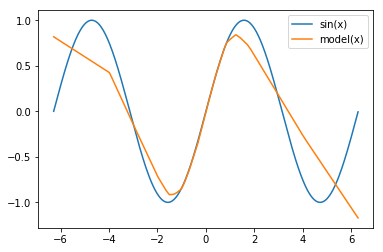

In [5]:
test_x = torch.arange(-2*math.pi, 2*math.pi, step=0.01).unsqueeze(1)
test_y = torch.sin(test_x)

t_y = model(test_x)

plt.plot(test_x.data.numpy(), test_y.data.numpy(), label='sin(x)')
plt.plot(test_x.data.numpy(), t_y.data.numpy(), label='model(x)')
plt.legend()
plt.savefig('maml-sine.png')